# 05. forecast(시계열 분석)

## 1. 배경 및 설치

- 윈도우 : Visual C++ Build Tool 설치
 - conda install pandas-datareader
 - conda install -c conda-forge fbprophet
   - pip install fbprophet

In [8]:
pip install prophet

     |████████████████████████████████| 8.8 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 93 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 800 kB 5.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install fbprophet

     |████████████████████████████████| 64 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 47 kB 4.9 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 417 kB/s eta 0:00:01
     |████████████████████████████████| 1.4 MB 443 kB/s eta 0:00:01
     |████████████████████████████████| 35.8 MB 439 kB/s eta 0:00:01
     |████████████████████████████████| 91 kB 5.1 MB/s eta 0:00:01
     |████████████████████████████████| 195 kB 2.1 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 3.8 MB/s eta 0:00:011
  ERROR: Command errored out with exit status 1:
   command: /Users/aragbagofideas/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/n3/lzr2m1rs4sxg33yprdptz8gc0000gn/T/pip-install-037wqtb4/fbprophet_cc2e3ffafa504b1685f2d0e13e6048e2/setup.py'"'"'; __file__='"'"'/private/var/folders/n3/lzr2m1rs4sxg33yprdptz8gc0000gn/T/pip-install-037wqtb4/fbprophet_cc2e3ffafa504b1685f2d0e13e6048e2/setup.py'"'"';f

  Created wheel for pymeeus: filename=PyMeeus-0.5.12-py3-none-any.whl size=732018 sha256=1057acfb2b3dcdc623c000b9c6fe6154947e650c0587de3c5d895f85f9a1ea50
  Stored in directory: /Users/aragbagofideas/Library/Caches/pip/wheels/04/1f/e5/8dd0c661cd8d252817655dc14a84f7ae045d6616594145aa81
Successfully built pymeeus
Failed to build fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.2.0
    Uninstalling cmdstanpy-1.2.0:
      Successfully uninstalled cmdstanpy-1.2.0
    Running setup.py install for fbprophet ... error
    ERROR: Command errored out with exit status 1:
     command: /Users/aragbagofideas/anaconda3/bin/python -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/n3/lzr2m1rs4sxg33yprdptz8gc0000gn/T/pip-install-037wqtb4/fbprophet_cc2e3ffafa504b1685f2d0e13e6048e2/setup.py'"'"'; __file__='"'"'/private/var/folders/n3/lzr2m1rs4sxg33yprdptz8gc0000gn/T/pip-install-037wqtb4/fbprophet_cc2e3ffafa504b1685f2d0e13e6048e

In [15]:
from pandas_datareader import data
from prophet import Prophet

## 함수(def)의 기초

In [16]:
def test_def(a,b):
    return a+b # return을 해줘야 다른 곳에서 사용할 수 있음

In [17]:
test_def(2,3)

5

In [18]:
a = 1 #전역변수

def edit_a(i):
    a = i #지역변수

In [19]:
edit_a(2)
a

1

In [20]:
a = 1 #전역변수

def edit_a(i):
    global a
    a = i #지역변수

In [21]:
edit_a(2)
a

2

- global 변수를 def 내에서 사용하고 싶다면 global로 선언
- def 내에서의 변수와 밖에서의 변수는 같은 이름이어도 같은 것이 아님

In [22]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
def plotSinWave(amp, freq, endTime, sampleTime, startTime, bias):
    '''
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    '''
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize = (12, 6))
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title(str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

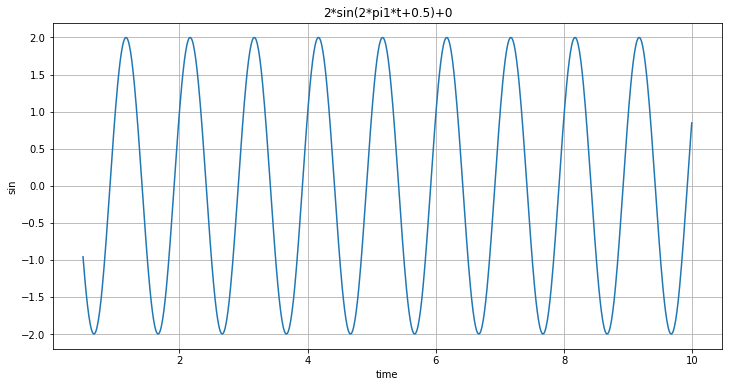

In [24]:
plotSinWave(2,1,10,0.01,0.5,0)

In [25]:
## **변수명 을 이용해 사용자가 직접 옵션명과 같이 값을 설정해주면 그 값을 이용하고
## 아니면 기본값을 이용해 계산됨

def plotSinWave(**kwargs):
    '''
    plot sine wave
    y = a sin(2 pi f t + t_0) + b
    '''
                        # 옵션명 , 기본값
    endTime = kwargs.get("endTime", 1)
    sampleTime = kwargs.get("sampleTime", 0.01)
    amp = kwargs.get("amp", 1)
    freq = kwargs.get("freq", 1)
    startTime =kwargs.get("startTime", 0)
    bias = kwargs.get("bias", 0)
    figsize = kwargs.get("figsize", (12,6))
    
    time = np.arange(startTime, endTime, sampleTime)
    result = amp * np.sin(2 * np.pi * freq * time + startTime) + bias
    
    plt.figure(figsize = figsize)
    plt.plot(time, result)
    plt.grid(True)
    plt.xlabel("time")
    plt.ylabel("sin")
    plt.title("함수 : " + str(amp) + "*sin(2*pi" + str(freq) + "*t+" + str(startTime) + ")+" + str(bias))
    plt.show()

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


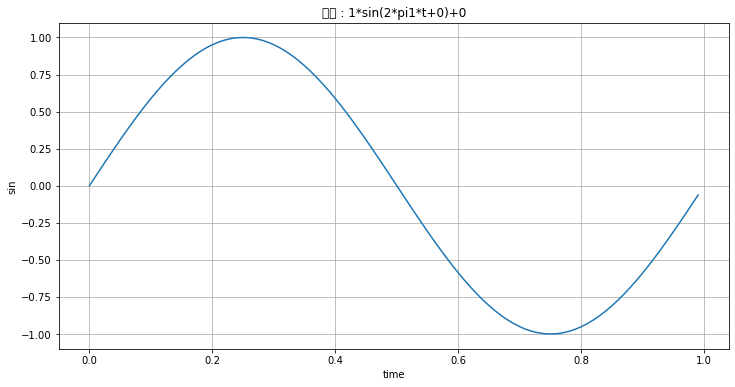

In [26]:
plotSinWave() # 기본값이 설정이 되어있기 때문에 함수 선언만 해도 오류가 없음

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


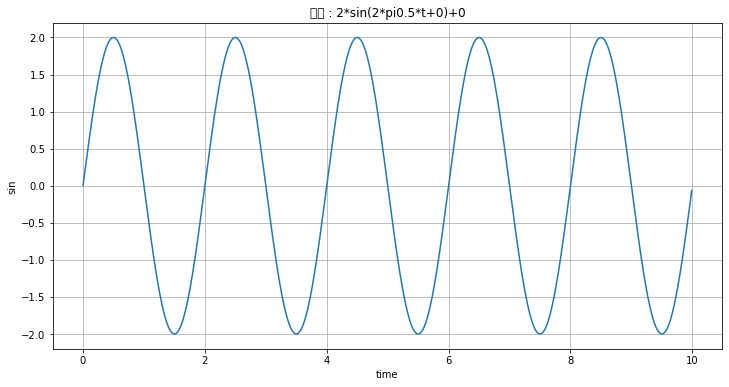

In [27]:
plotSinWave(amp = 2, freq = 0.5, endTime = 10)

## 2. fbprophet 기초


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='Arial Unicode MS')

# 1

In [30]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time)
ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})
df.head()

,ds,y
0,2018-01-01,0.000000
1,2018-01-02,0.103243
2,2018-01-03,0.205382
3,2018-01-04,0.305326
4,2018-01-05,0.402007


<AxesSubplot:>

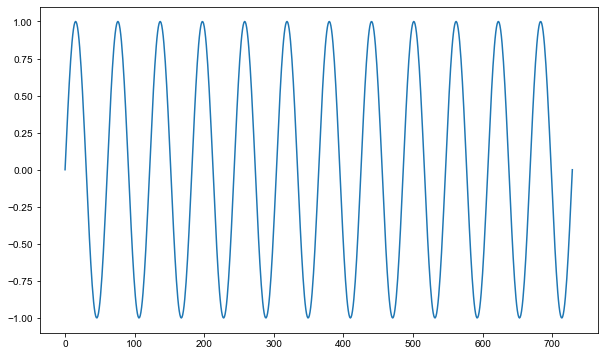

In [31]:
df["y"].plot(figsize = (10,6))

In [32]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [33]:
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

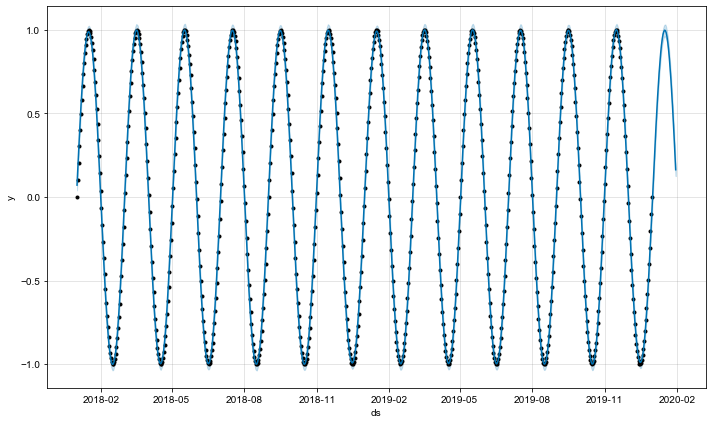

In [34]:
m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

# 2

<AxesSubplot:>

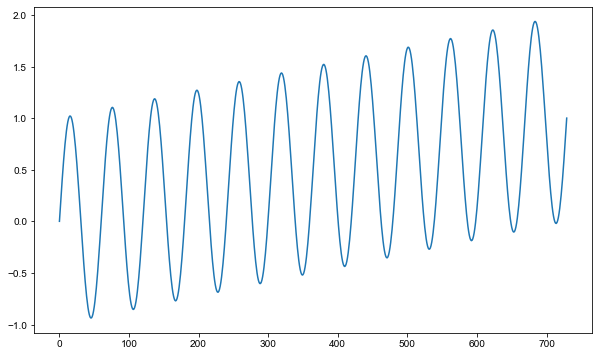

In [35]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time

ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})

df["y"].plot(figsize = (10,6))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


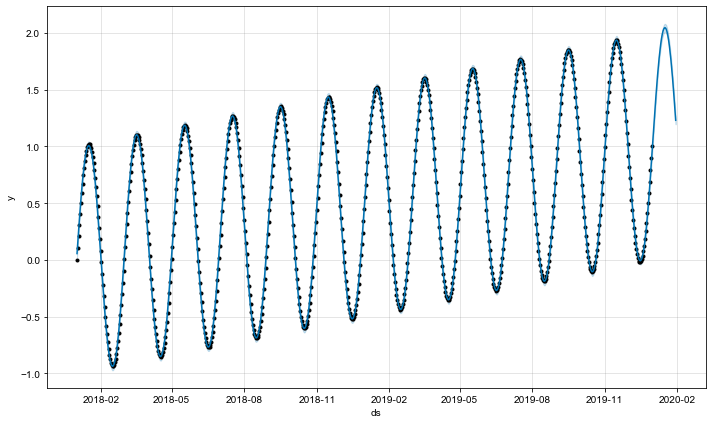

In [36]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

# 3

<AxesSubplot:>

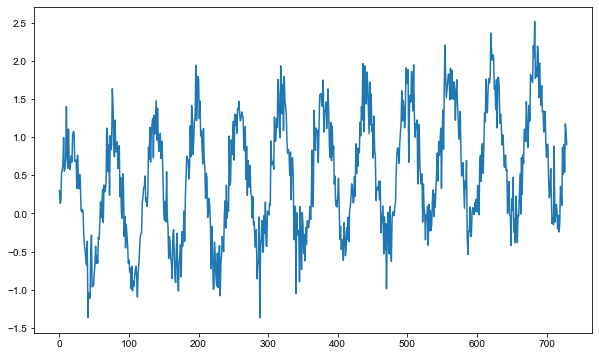

In [37]:
time = np.linspace(0,1,365*2)
result = np.sin(2*np.pi*12*time) + time + np.random.randn(365*2)/4 #노이즈를 추가

ds = pd.date_range("2018-01-01", periods = 365*2, freq = "D")
df = pd.DataFrame({"ds" : ds, "y" : result})

df["y"].plot(figsize = (10,6))

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


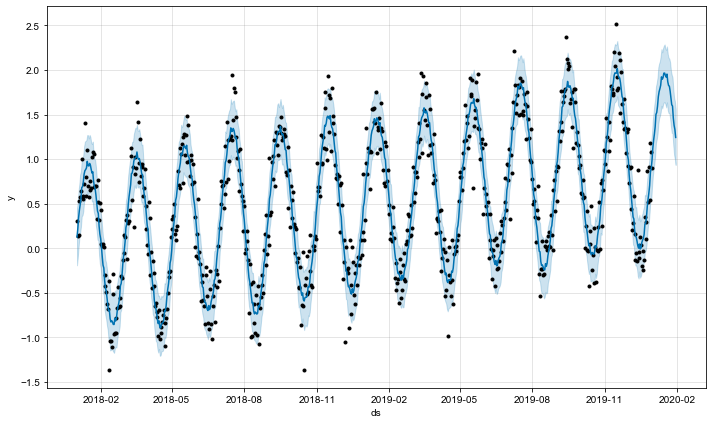

In [38]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
m.fit(df) # 우리가 만든 데이터를 집어넣어 학습시킴
future = m.make_future_dataframe(periods = 30) #30일 간의 데이터를 예측해봐라
forecast = m.predict(future) #예측값 저장

m.plot(forecast); #점이 찍혀있지 않은 그래프 부분이 학습에 의한 예측값 부분!

## 3. 시계열 데이터 실전 이용해보기

In [40]:
import pandas as pd
import pandas_datareader as web
import numpy as np


from prophet import Prophet
from datetime import datetime

In [41]:
pinkwink_web = pd.read_csv(
    "../data/05_PinkWink_Web_Traffic.csv",
    encoding = "utf-8",
    thousands = ",",
    names = ["date", "hit"],
    index_col = 0
)
(pinkwink_web["hit"].isnull()).sum()

1

In [42]:
pinkwink_web[pinkwink_web["hit"].isnull()] # 모든 데이터가 nan인 데이터가 포함되어있어 삭제

,hit
date,
NaN,NaN


In [43]:
pinkwink_web = pinkwink_web[pinkwink_web["hit"].notnull()]
pinkwink_web

,hit
date,
16. 7. 1.,766.0
16. 7. 2.,377.0
16. 7. 3.,427.0
16. 7. 4.,902.0
16. 7. 5.,850.0
...,...
17. 6. 26.,1309.0
17. 6. 27.,1436.0
17. 6. 28.,1387.0


<AxesSubplot:xlabel='date'>

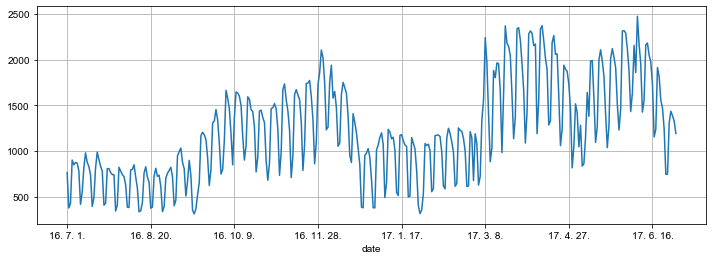

In [44]:
# 전체 데이터 그려보기
pinkwink_web["hit"].plot(
    figsize = (12,4),
    grid = True

)

In [45]:
# trend 분석을 시각화하기 위한 x축 값 만들기
time = np.arange(0,len(pinkwink_web)) # 날짜 데이터 개수만큼의 x축 데이터 만들기

In [46]:
traffic = pinkwink_web["hit"].values #y값
fx = np.linspace(0,time[-1], 1000) #0부터 x마지막 데이터 사이에서 1000개의 데이터 추출

In [47]:
# 에러를 계산할 함수(RMSE)
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))

In [48]:
# prophet을 사용하기 전, 이전 시간에 배웠던 회귀 직선을 이용해 추측해보자.

fp1 = np.polyfit(time, traffic, 1) # 1차식
f1 = np.poly1d(fp1) # 위에서 구한 값들로 다항식을 생성해줌

fp2 = np.polyfit(time, traffic, 2) # 2차식
f2 = np.poly1d(fp2)

fp3 = np.polyfit(time, traffic, 3) # 3차식
f3 = np.poly1d(fp3)

fp15 = np.polyfit(time, traffic, 15) # 15차식
f15 = np.poly1d(fp15)

In [49]:
print(error(f1, time, traffic))
print(error(f2, time, traffic))
print(error(f3, time, traffic))
print(error(f15, time, traffic))

430.85973081109626
430.6284101894695
429.53280466762925
330.4777304274343


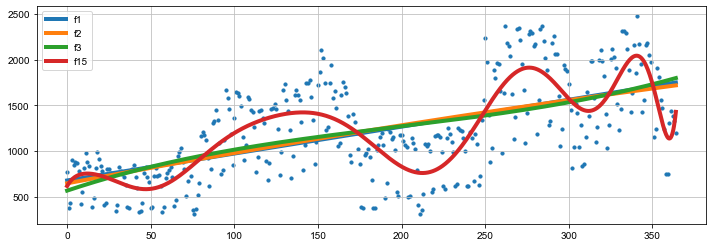

In [50]:
plt.figure(figsize = (12,4))
plt.scatter(time, traffic, s = 10)
plt.plot(fx, f1(fx), lw = 4, label = "f1")
plt.plot(fx, f2(fx), lw = 4, label = "f2")
plt.plot(fx, f3(fx), lw = 4, label = "f3")
plt.plot(fx, f15(fx), lw = 4, label = "f15")

plt.grid(True, linestyle = '-', color = "0.75")
plt.legend(loc = 2)
plt.show()

In [51]:
# Prophet 으로 예측해보기

df = pd.DataFrame({"ds" : pinkwink_web.index, "y" : pinkwink_web['hit']})
df.reset_index(inplace = True)
df["ds"] = pd.to_datetime(df["ds"], format = "%y. %m. %d.") # 날짜 형식 변환
del df['date']
df.head()

,ds,y
0,2016-07-01,766.0
1,2016-07-02,377.0
2,2016-07-03,427.0
3,2016-07-04,902.0
4,2016-07-05,850.0


In [52]:
m = Prophet(yearly_seasonality=True, daily_seasonality=True)
# 데이터 학습
m.fit(df) 
# 60일에 해당하는 데이터 생성
future = m.make_future_dataframe(periods = 60)
# 예측 결과는 상한/하한의 범위를 포함해서 얻어짐
forecast = m.predict(future) 

forecast #결과로 얻어지는 해당 열들에 대한 설명을 찾고 싶은데 못 찾겠다ㅠ

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-07-01,826.703704,544.149424,947.680755,826.703704,826.703704,-86.512904,-86.512904,-86.512904,244.691931,...,-51.557711,-51.557711,-51.557711,-279.647124,-279.647124,-279.647124,0.0,0.0,0.0,740.190800
1,2016-07-02,827.490485,85.346242,519.250351,827.490485,827.490485,-519.869397,-519.869397,-519.869397,244.691931,...,-467.924576,-467.924576,-467.924576,-296.636752,-296.636752,-296.636752,0.0,0.0,0.0,307.621088
2,2016-07-03,828.277266,217.969263,631.946206,828.277266,828.277266,-401.471094,-401.471094,-401.471094,244.691931,...,-335.637545,-335.637545,-335.637545,-310.525480,-310.525480,-310.525480,0.0,0.0,0.0,426.806172
3,2016-07-04,829.064047,752.412310,1194.502664,829.064047,829.064047,140.619441,140.619441,140.619441,244.691931,...,217.450781,217.450781,217.450781,-321.523271,-321.523271,-321.523271,0.0,0.0,0.0,969.683488
4,2016-07-05,829.850828,776.873074,1215.095415,829.850828,829.850828,168.480982,168.480982,168.480982,244.691931,...,253.671971,253.671971,253.671971,-329.882921,-329.882921,-329.882921,0.0,0.0,0.0,998.331809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,2017-08-25,1157.811873,683.698832,1098.544909,1157.805278,1157.819364,-270.060254,-270.060254,-270.060254,244.691931,...,-51.557711,-51.557711,-51.557711,-463.194475,-463.194475,-463.194475,0.0,0.0,0.0,887.751618
421,2017-08-26,1158.600369,256.634442,693.276644,1158.593614,1158.608013,-686.209768,-686.209768,-686.209768,244.691931,...,-467.924576,-467.924576,-467.924576,-462.977123,-462.977123,-462.977123,0.0,0.0,0.0,472.390601
422,2017-08-27,1159.388864,390.625047,813.009038,1159.381854,1159.396582,-554.162423,-554.162423,-554.162423,244.691931,...,-335.637545,-335.637545,-335.637545,-463.216809,-463.216809,-463.216809,0.0,0.0,0.0,605.226442
423,2017-08-28,1160.177360,953.078265,1371.117347,1160.170091,1160.185287,-1.687227,-1.687227,-1.687227,244.691931,...,217.450781,217.450781,217.450781,-463.829939,-463.829939,-463.829939,0.0,0.0,0.0,1158.490134


In [53]:
forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

,ds,yhat,yhat_lower,yhat_upper
420,2017-08-25,887.751618,683.698832,1098.544909
421,2017-08-26,472.390601,256.634442,693.276644
422,2017-08-27,605.226442,390.625047,813.009038
423,2017-08-28,1158.490134,953.078265,1371.117347
424,2017-08-29,1194.622250,973.659832,1383.743011


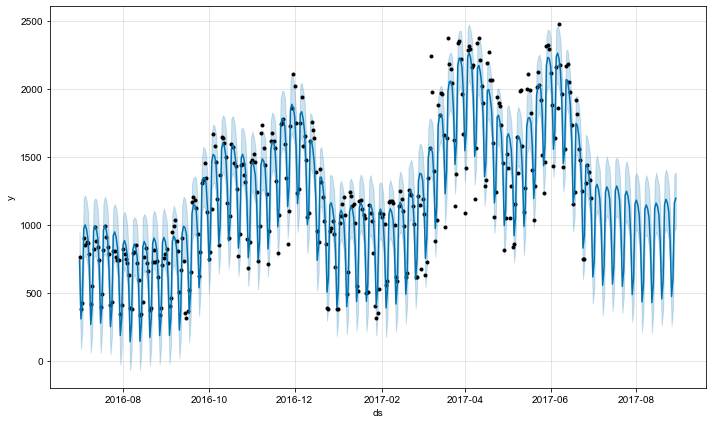

In [54]:
m.plot(forecast);

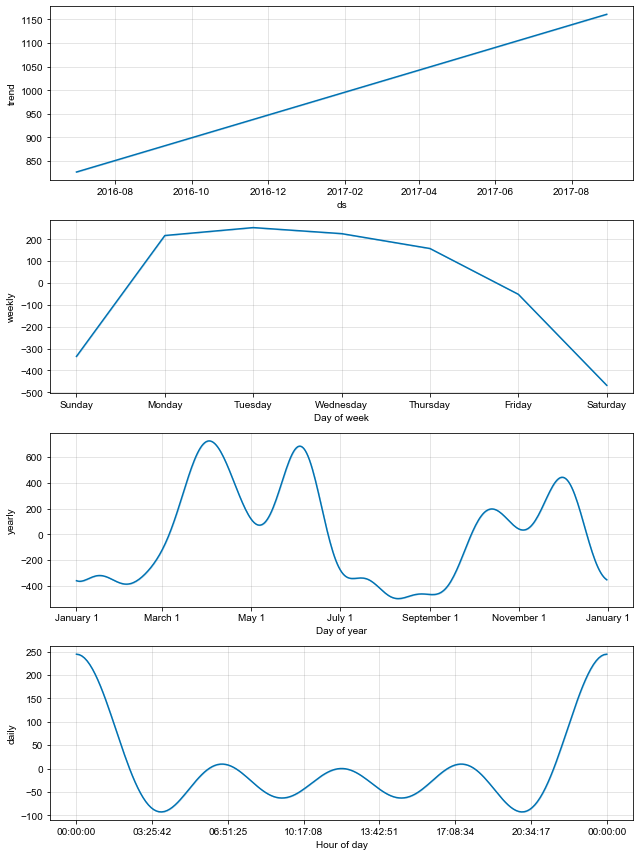

In [55]:
# 각 주제에 맞는 경향을 파악할 수 있음
m.plot_components(forecast);

In [56]:
"""
# 에러를 계산할 함수(RMSE)
def error(f, x, y):
    return np.sqrt(np.mean((f(x) - y) ** 2))
"""

np.sqrt(np.mean((forecast["yhat"] - df["y"]) ** 2))

164.24788549842594